# **Proyecto: Análisis y Limpieza de Datos sobre Vehículos Eléctricos**

## 🎯 **Objetivo y Contexto**

El crecimiento de los vehículos eléctricos (EVs) ha sido impulsado por la necesidad de reducir las emisiones y fomentar el uso de energías limpias. Sin embargo, analizar datos de estos vehículos puede ser un desafío debido a la inconsistencia y desorden en los registros.

Este proyecto busca limpiar, transformar y analizar el dataset **"Electric Vehicle Population Data (Messy Data)"** para obtener información útil sobre la distribución, adopción y características de los vehículos eléctricos en diferentes regiones.

### 🔍 **Preguntas clave a responder:**
✅ **¿Cuáles son las marcas y modelos más populares?**  
✅ **¿Cómo ha evolucionado el registro de vehículos eléctricos a lo largo del tiempo?**  
✅ **¿Existe una relación entre el precio y la autonomía de los vehículos?**  
✅ **¿Cómo se distribuyen los vehículos eléctricos geográficamente?**  
✅ **¿Cuántos vehículos califican para incentivos de energía limpia?**  

## **1️⃣ Limpieza y Normalización de Datos**

Los datos suelen contener inconsistencias como valores faltantes, formatos incorrectos o duplicados. En esta sección, nos enfocaremos en:

### 📌 **Tareas a realizar:**
- 🔹 **Identificar y manejar valores faltantes** en columnas clave (*County, City, Electric Range, Base MSRP, Legislative District*).
- 🔹 **Convertir los datos a los tipos adecuados**, por ejemplo, asegurando que códigos postales sean *strings* y rangos eléctricos sean enteros.
- 🔹 **Extraer coordenadas geográficas** de la columna *Vehicle Location* para su uso posterior en mapas.

### 📊 **Gráfico:**
📍 **Histograma:** *Distribución de la autonomía (Electric Range) antes y después de la limpieza* para visualizar cambios en la calidad de los datos.


In [8]:
import pandas as pd 
# print(pd.__version__)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# cargar el dataset
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223995 entries, 0 to 223994
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         223995 non-null  object 
 1   County                                             223992 non-null  object 
 2   City                                               223992 non-null  object 
 3   State                                              223995 non-null  object 
 4   Postal Code                                        223992 non-null  float64
 5   Model Year                                         223995 non-null  int64  
 6   Make                                               223995 non-null  object 
 7   Model                                              223995 non-null  object 
 8   Electric Vehicle Type                              223995 non-null  object

In [10]:
df.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4JJXP66P,Kitsap,Poulsbo,WA,98370.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,23.0,258127145,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
1,1G1FX6S08K,Snohomish,Lake Stevens,WA,98258.0,2019,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,44.0,4735426,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10
2,WBY1Z2C58F,King,Seattle,WA,98116.0,2015,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81.0,0.0,34.0,272697666,POINT (-122.41067 47.57894),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1V24F,Yakima,Selah,WA,98942.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,0.0,15.0,258112970,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10


In [14]:
# -------- Limpieza y normalizacdion de datos -------# 
# manejar datos faltantes
df.fillna({"Country": "Unknown",
           "City": "Unknown",  # *busca datos perdidos
           "Electric Range": df["Electric Range"].median(),
           "Base MSRP":df["Base MSRP"].median(),
           "Legislative  District": "Unknown"
           }, inplace=True)

# Conversion de tipos datos
df["Postal Code"] = df["Postal Code"].astype(str)
df["Electric Range"] =  df["Electric Range"].astype(int) # cambiamos el tipo de datos 

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223995 entries, 0 to 223994
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         223995 non-null  object 
 1   County                                             223992 non-null  object 
 2   City                                               223995 non-null  object 
 3   State                                              223995 non-null  object 
 4   Postal Code                                        223995 non-null  object 
 5   Model Year                                         223995 non-null  int64  
 6   Make                                               223995 non-null  object 
 7   Model                                              223995 non-null  object 
 8   Electric Vehicle Type                              223995 non-null  object

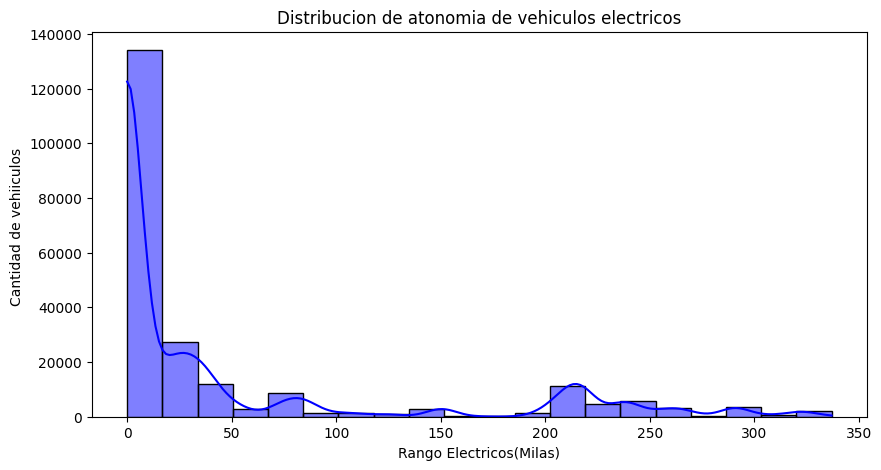

In [18]:
# Histograma de Electric Range antes y despues de limpieza
plt.figure(figsize=(10,5))
sns.histplot(df["Electric Range"], bins=20, kde=True, color="blue")
plt.title("Distribucion de atonomia de vehiculos electricos")
plt.xlabel("Rango Electricos(Milas)")
plt.ylabel("Cantidad de vehiiculos ")
plt.show() 


## **2️⃣ Análisis de Adopción de Vehículos Eléctricos**

Queremos entender cómo ha crecido la adopción de los EVs, qué marcas dominan el mercado y qué tipos de vehículos son más comunes.

### 📌 **Tareas a realizar:**
- 🔹 **Identificar las marcas y modelos más populares** basándonos en el número de registros.
- 🔹 **Analizar la evolución de los registros** a lo largo del tiempo con la columna *Model Year*.
- 🔹 **Comparar la proporción de diferentes tipos de vehículos eléctricos** (*Battery Electric Vehicle (BEV)* vs. *Plug-in Hybrid Electric Vehicle (PHEV)*).

### 📊 **Gráficos:**
📍 **Gráfico de barras:** *Top 10 marcas con más vehículos registrados* para ver qué fabricantes dominan el mercado.  
📍 **Gráfico de líneas:** *Evolución de los registros de vehículos eléctricos por año* para identificar tendencias en la adopción.  


In [29]:
df["Make"].value_counts().head(10)

Make
TESLA        96180
CHEVROLET    16405
NISSAN       15259
FORD         11930
KIA          10760
BMW           9171
TOYOTA        8956
HYUNDAI       6878
RIVIAN        6236
JEEP          5773
Name: count, dtype: int64

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18716\2445419293.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_brands.index, y = top_brands.values, palette="viridis" )


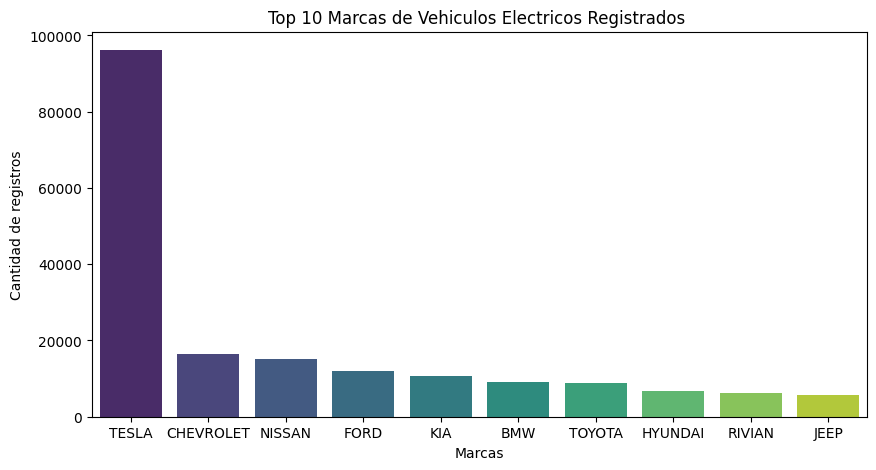

In [41]:
# # -------- Analisis de adopcion  de vehiculos electricos -------------
# # Top 10 de marcars con mas registros 

top_brands = df["Make"].value_counts().head(10)
 
# print(top_brans)
plt.figure(figsize=(10,5))
sns.barplot(x = top_brands.index, y = top_brands.values, palette="viridis" )
plt.title("Top 10 Marcas de Vehiculos Electricos Registrados ")
plt.xlabel("Marcas")
plt.ylabel("Cantidad de registros")
plt.show() 

In [51]:
# Evaluacion d registros de vehiculos electricos por ano 
# print(df.groupby("Model year").size())
print(df["Model Year"])



0         2023
1         2019
2         2015
3         2019
4         2015
          ... 
223990    2024
223991    2021
223992    2011
223993    2024
223994    2019
Name: Model Year, Length: 223995, dtype: int64


In [ ]:
# dataModelYear = df.groupby("Model Year").size() 
df_filter = df[(df["Model Year"] >= 2000) & (df["Model Year"] <= 2024)]
# print(df.groupby("Model Year").size())
filterModelYear = df_filter.groupby("Model Year").size()
print(filterModelYear)



Model Year
2000        7
2002        2
2003        1
2008       23
2010       23
2011      692
2012     1513
2013     4258
2014     3404
2015     4680
2016     5358
2017     8433
2018    14142
2019    10874
2020    12103
2021    20278
2022    28610
2023    59060
2024    45525
dtype: int64


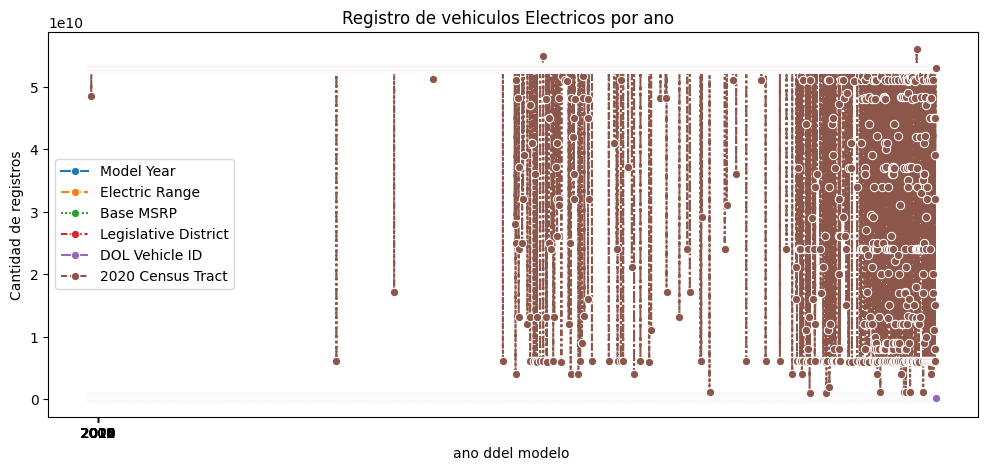

In [65]:
plt.figure(figsize=(12,5))
sns.lineplot(data = filterModelYear, marker='o', color='red' )
plt.xticks(ticks = range(2000, 2024,2 ))
plt.title("Registro de vehiculos Electricos por ano  ")
plt.xlabel("ano ddel modelo ")
plt.ylabel("Cantidad de registros")
plt.show() 

## **3️⃣ Impacto de la Autonomía y el Precio en la Adopción**

¿La autonomía de un vehículo eléctrico influye en su popularidad? ¿El precio afecta la cantidad de unidades registradas? Aquí analizamos la relación entre estos factores.

### 📌 **Tareas a realizar:**
- 🔹 **Examinar la relación entre Electric Range (autonomía) y Base MSRP (precio base).**
- 🔹 **Determinar si los modelos con mayor autonomía son los más registrados.**
- 🔹 **Comparar la distribución de precios entre diferentes tipos de vehículos eléctricos.**

### 📊 **Gráfico:**
📍 **Scatter Plot:** *Autonomía vs. Precio base* para ver si hay una correlación entre estos dos factores.


In [69]:
df["Base MSRP"]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
223990    0.0
223991    0.0
223992    0.0
223993    0.0
223994    0.0
Name: Base MSRP, Length: 223995, dtype: float64

In [70]:
df["Base MSRP"].value_counts()

Base MSRP
0.0         220735
69900.0       1315
31950.0        364
52900.0        218
32250.0        139
59900.0        121
54950.0        118
39995.0        117
36900.0        104
44100.0         95
64950.0         88
45600.0         75
33950.0         71
52650.0         71
34995.0         67
55700.0         57
36800.0         54
53400.0         39
81100.0         23
98950.0         22
110950.0        20
90700.0         17
102000.0        12
75095.0         12
184400.0        11
43700.0          8
109000.0         7
89100.0          7
91250.0          4
32995.0          3
845000.0         1
Name: count, dtype: int64

In [72]:
df["Base MSRP"].describe()

count    223995.000000
mean        829.827697
std        7372.216572
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      845000.000000
Name: Base MSRP, dtype: float64

In [71]:
df["Electric Range"].value_counts() 

Electric Range
0      130460
215      6296
32       5254
25       4559
21       4458
        ...  
11          4
51          4
95          3
57          2
74          2
Name: count, Length: 109, dtype: int64

In [73]:
df_filter = df[(df["Base MSRP"] >= 1000) & (df["Base MSRP"] <= 2000000)]
df_filter["Base MSRP"]

6         55700.0
16        69900.0
24        45600.0
51        69900.0
88        31950.0
           ...   
223727    69900.0
223792    39995.0
223934    69900.0
223972    31950.0
223982    39995.0
Name: Base MSRP, Length: 3260, dtype: float64

Text(0, 0.5, 'Cantidad de registros')

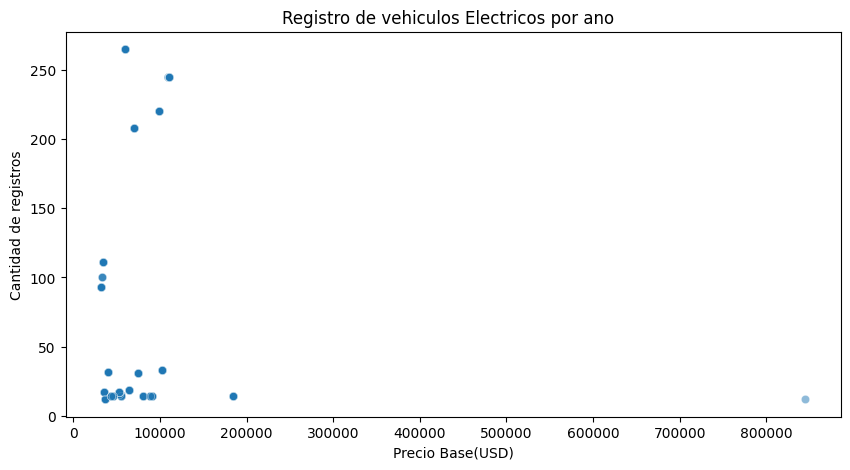

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_filter["Base MSRP"], y = df_filter["Electric Range"], alpha = 0.5)

plt.title("Relacjion entre precio bajo y autonomia ")
plt.xlabel("Precio Base(USD)")
plt.ylabel("Autonomia (millas )")


## **4️⃣ Elegibilidad para Programas de Combustible Alternativo**

El acceso a incentivos gubernamentales puede influir en la compra de EVs. Vamos a explorar cuántos vehículos cumplen con los requisitos para estos programas.

### 📌 **Tareas a realizar:**
- 🔹 **Determinar la cantidad de vehículos elegibles vs. no elegibles** para programas de combustible alternativo.
- 🔹 **Analizar si los vehículos elegibles tienen características comunes,** como mayor autonomía o menor precio.

### 📊 **Gráfico:**
📍 **Gráfico de pastel:** *Proporción de vehículos elegibles vs. no elegibles* para incentivos gubernamentales.

In [75]:
df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"]

0                     Not eligible due to low battery range
1                   Clean Alternative Fuel Vehicle Eligible
2                   Clean Alternative Fuel Vehicle Eligible
3                   Clean Alternative Fuel Vehicle Eligible
4                   Clean Alternative Fuel Vehicle Eligible
                                ...                        
223990    Eligibility unknown as battery range has not b...
223991    Eligibility unknown as battery range has not b...
223992              Clean Alternative Fuel Vehicle Eligible
223993    Eligibility unknown as battery range has not b...
223994              Clean Alternative Fuel Vehicle Eligible
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, Length: 223995, dtype: object

In [79]:
elegibility_count = df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].value_counts()


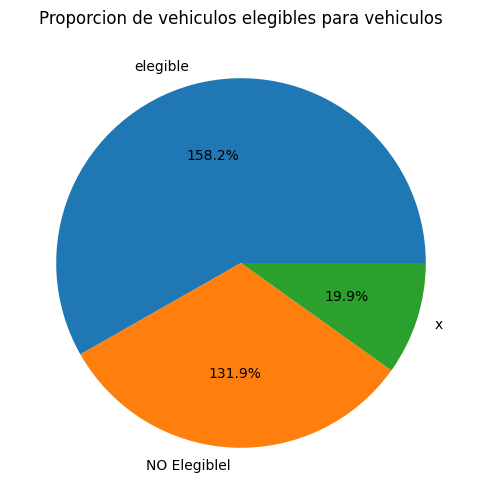

In [82]:
plt.figure(figsize=(6,6))
plt.pie(elegibility_count, labels=["elegible", "NO Elegiblel", "x" ], autopct='1%1.1f%%')
plt.title("Proporcion de vehiculos elegibles para vehiculos")
plt.show()